# Data Analysis of 911 Calls - Capstone Project

The 911 system was designed to provide a universal, easy-to-remember number for people to reach police, fire or emergency medical assistance from any phone in any location, without having to look up specific phone numbers. Today, people communicate in ways that the designers of the original 911 system could not have envisioned: wireless phones, text and video messages, social media, Internet Protocol (IP)-enabled devices, and more.

The National 911 Program works with States, technology providers, public safety officials and 911 professionals to ensure a smooth transition to an updated 911 system that takes advantage of new communications technologies. It also creates and shares a variety of resources and tools to help 911 systems.

Created by Congress in 2004 as the 911 Implementation and Coordination Office (ICO), the National 911 Program is housed within the National Highway Traffic Safety Administration at the U.S. Department of Transportation and is a joint program with the National Telecommunication and Information Administration in the Department of Commerce

This is a capstone project for the udemy course ["Python for Data Science and Machine Learning Bootcamp"
](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/) [](http://)

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)



In [1]:
# Importing numpy and pandas libraries

import numpy as np
import pandas as pd

In [2]:
#Importing Visualization libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Read in the csv file from Kaggle and create a dataframe called df

df=pd.read_csv('../input/montcoalert/911.csv')

In [4]:
#Check the info() of the df

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 628737 entries, 0 to 628736
Data columns (total 9 columns):
lat          628737 non-null float64
lng          628737 non-null float64
desc         628737 non-null object
zip          552155 non-null float64
title        628737 non-null object
timeStamp    628737 non-null object
twp          628468 non-null object
addr         628737 non-null object
e            628737 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 43.2+ MB


In [5]:
#Read in the csv file as a dataframe called df

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Creating new features

In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Now using .apply() with a custom lambda expression we will create a new column called "Reason" that contains this string value.**

*For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. *

In [6]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [7]:
#What is the most common Reason for a 911 call based off of this new column?

df['Reason'].value_counts()

EMS        313625
Traffic    220937
Fire        94175
Name: Reason, dtype: int64

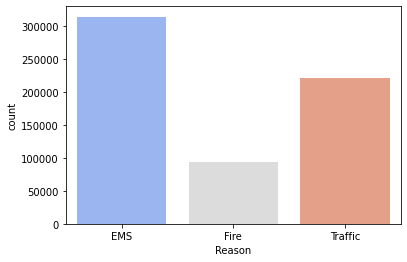

In [8]:
#Now using seaborn to create a countplot of 911 calls by Reason.

sns.countplot(x='Reason',data=df,palette='coolwarm')

In [9]:
#Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column?

type(df['timeStamp'].iloc[0])

str

In [10]:
#Use [pd.to_datetime] to convert the column from strings to DateTime objects

df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [11]:
# Since the timestamp column are actually DateTime objects, we will use .apply() to create 3 new columns called Hour, Month, and Day of Week. 

df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [12]:
#Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:

dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

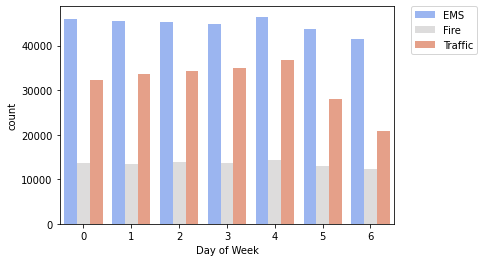

In [13]:
#Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column.

sns.countplot(x='Day of Week',data=df,hue='Reason',palette='coolwarm')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

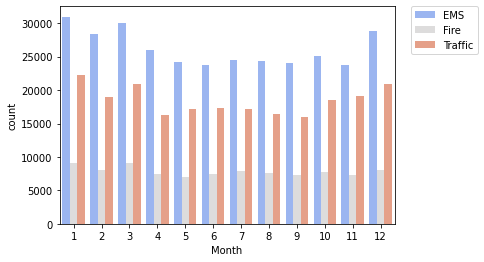

In [14]:
#Now use seaborn to create a countplot of the Month column.

sns.countplot(x='Month',data=df,hue='Reason',palette='coolwarm')

# To relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [15]:
#Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method

df['Date']=df['timeStamp'].apply(lambda t: t.date())

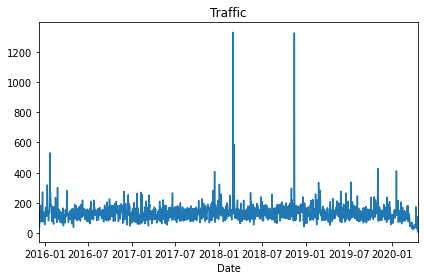

In [16]:
#Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls and recreate this plot representing a Reason for the 911 call

df[df['Reason']=='Traffic'].groupby('Date').count()['twp'].plot()
plt.title('Traffic')
plt.tight_layout()

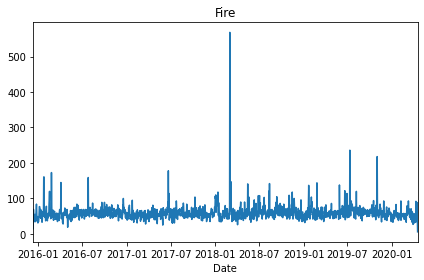

In [17]:
#Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

df[df['Reason']=='Fire'].groupby('Date').count()['twp'].plot()
plt.title('Fire')
plt.tight_layout()

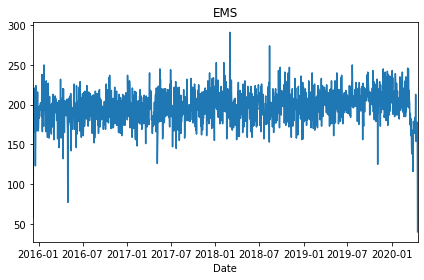

In [18]:
#Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call

df[df['Reason']=='EMS'].groupby('Date').count()['twp'].plot()
plt.title('EMS')
plt.tight_layout()

In [19]:
# Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. 
#There are lots of ways to do this, but I would recommend trying to combine groupby with an unstack method. 

dayHour = df.groupby(by=['Day of Week','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
0,1775,1469,1290,1203,1269,1741,2571,4270,5314,5470,...,5365,5866,6028,6122,5174,4247,3576,3065,2506,1957
1,1615,1370,1261,1150,1180,1660,2669,4238,5402,5322,...,5593,5957,6185,6601,5371,4353,3647,3233,2555,2007
2,1571,1398,1198,1197,1052,1518,2546,4488,5274,5198,...,5657,6145,6424,6702,5381,4454,3889,3329,2653,2090
3,1624,1318,1340,1167,1199,1678,2692,4286,5115,5119,...,5752,6145,6044,6632,5237,4439,3871,3303,2688,2226
4,1861,1528,1362,1237,1237,1551,2554,3976,4812,5007,...,6049,6667,6734,6795,5374,4780,4124,3677,3234,2703


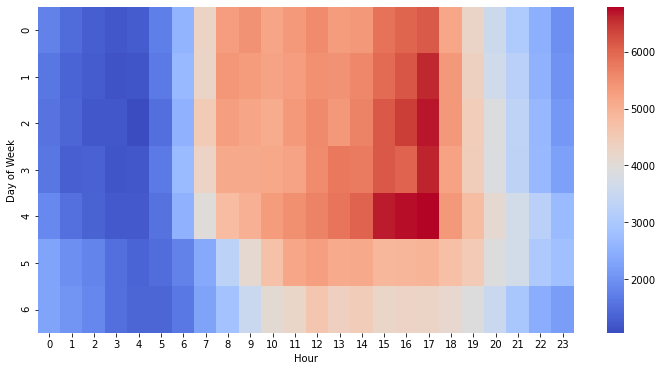

In [20]:
#Now create a HeatMap using this new DataFrame.

plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='coolwarm')

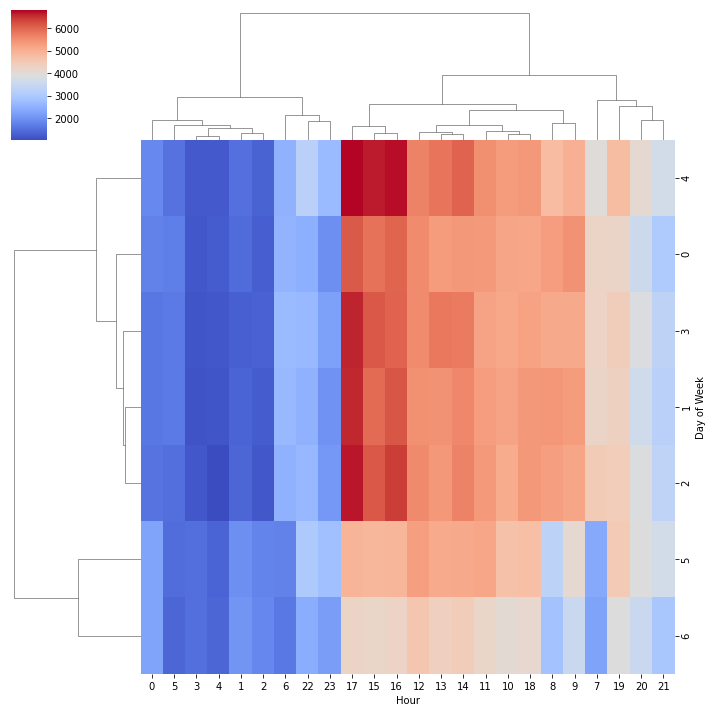

In [21]:
#Now create a clustermap using this DataFrame

sns.clustermap(dayHour,cmap='coolwarm')

In [22]:
#Now repeat these same plots and operations, for a DataFrame that shows the Month as the column

dayMonth = df.groupby(by=['Day of Week','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Day of Week,,,,,,,,,,,,
0,8896,8747,8060,7843,6746,6740,7929,6854,6598,8075,6722,8492
1,9714,8087,8372,6998,7835,6689,7637,7291,6601,7948,7344,8305
2,9409,8296,8989,7064,7942,7055,6976,7984,6844,7876,7410,7682
3,9055,7997,8849,6902,7524,7850,6964,7508,6954,7482,8358,8151
4,9309,8255,10941,7479,7214,7647,7103,7336,7694,6934,8379,9305


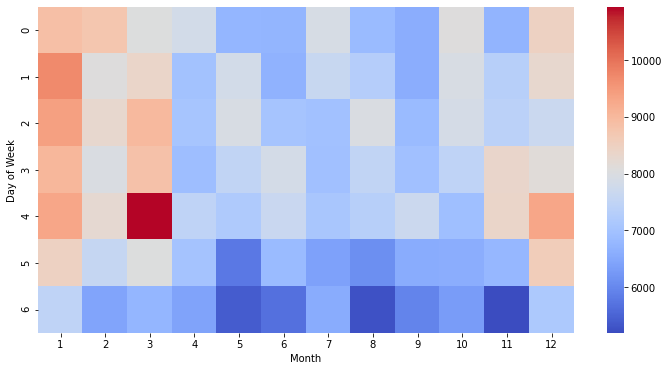

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth,cmap='coolwarm')

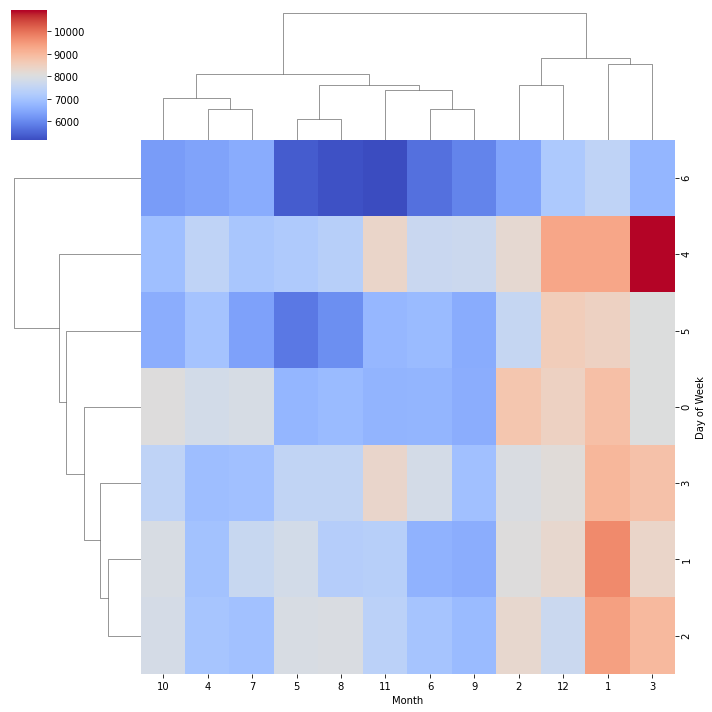

In [24]:
sns.clustermap(dayMonth,cmap='coolwarm')